# 라이브러리 불러오기

In [138]:
import pandas as pd

In [139]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [140]:
# FinanceDataReader 를 fdr 별칭으로 가져오기
import FinanceDataReader as fdr

# 개별 종목의 일별 시세 수집

In [141]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'
df = fdr.DataReader("005930",start="2021-01-01",end="2022")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


<AxesSubplot:xlabel='Date'>

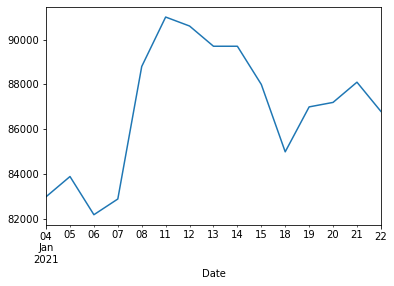

In [142]:
# 종가 시각화하기
df["Close"].plot(  )

# 상장종목 목록 가져오기

In [143]:
# 데이터가 없을 경우: fdr.StockListing('KRX')
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(6676, 10)

In [144]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx[["Symbol","Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
6671,000547,흥국화재2우B
6672,000545,흥국화재우
6673,003280,흥아해운
6674,037440,희림


In [145]:
# df_krx의 Name column 에서 '빅히트'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['빅히트'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 빅히트 (series) -> ['빅히트'] (list) -> '빅히트' (string)
item_name ="대한항공"

df_krx[df_krx["Name"] ==item_name]["Symbol"]
df_krx.loc[df_krx["Name"]==item_name,"Symbol"].tolist()[0]



'003490'

# 종목명으로 종목 코드를 받아오는 함수 만들기

In [146]:

# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.
def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"]==item_name,"Symbol"].tolist()
    if len(item_code_list) > 0:
        return item_code_list[0]
    else:
        return False
    

In [147]:
item_code_by_item_name(item_name)

'003490'

In [148]:
# 네이버로 등록된 상장사는 없습니다.
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인합니다.
item_code_by_item_name("네이버")
item_code_by_item_name("NAVER")


'035420'

In [149]:
fdr.DataReader(item_code_by_item_name(item_name))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-02-12,9251,9438,9251,9314,52690,NaN
1997-02-13,9312,9563,9250,9377,100450,0.006764
1997-02-14,9375,9812,9375,9563,46920,0.019836
1997-02-15,9563,9625,9500,9563,17770,0.000000
1997-02-17,9499,9499,9312,9501,22180,-0.006483
...,...,...,...,...,...,...
2021-01-18,31600,31800,30150,30450,4329133,-0.052877
2021-01-19,30450,31850,30400,31700,3076678,0.041051
2021-01-20,32100,32300,31150,32050,2921124,0.011041


# 종목명으로 일별시세를 받아오는 함수 만들기

In [150]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택

def find_item_list(item_name,year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    
    item_code = item_code_by_item_name(item_name)
    
    if item_code:
        df_day = fdr.DataReader(item_code,str(year))
        return df_day
    else:
        return False




In [151]:
# find_item_list("없는회사")

find_item_list(item_name,2015)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,35660,36406,33681,33720,965216,-0.048479
2015-01-05,33979,34801,33046,34504,828646,0.023250
2015-01-06,34839,35511,34092,34093,861173,-0.011912
2015-01-07,32112,33346,30582,32487,2957691,-0.047106
2015-01-08,32560,33084,31739,32338,498732,-0.004586
...,...,...,...,...,...,...
2021-01-18,31600,31800,30150,30450,4329133,-0.052877
2021-01-19,30450,31850,30400,31700,3076678,0.041051
2021-01-20,32100,32300,31150,32050,2921124,0.011041


## 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [152]:
item_name1 = "LG화학"
item_name2 = "빅히트"

# find_item_list(item_name1)
stock_daily = find_item_list(item_name)
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,23832,23874,23205,23289,303459,-0.022825
2020-01-03,23414,23540,22787,22829,572272,-0.019752
2020-01-06,22453,22662,21742,22160,690224,-0.029305
2020-01-07,22160,22704,22076,22453,388103,0.013222
2020-01-08,22118,22327,21700,21993,676198,-0.020487
...,...,...,...,...,...,...
2021-01-18,31600,31800,30150,30450,4329133,-0.052877
2021-01-19,30450,31850,30400,31700,3076678,0.041051
2021-01-20,32100,32300,31150,32050,2921124,0.011041


# 개별종목 시세 시각화

In [153]:
# pandas 의 plot으로 시각화 하기

<AxesSubplot:xlabel='Date'>

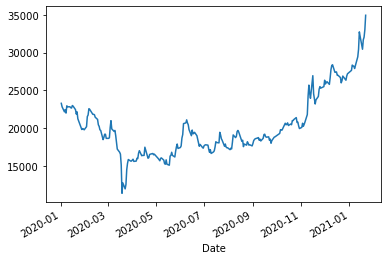

In [154]:
stock_daily["Close"].plot()

<AxesSubplot:xlabel='Date'>

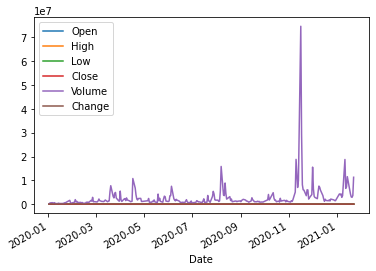

In [155]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로 그립니다.
stock_daily.plot()

## 서브플롯으로 그리기

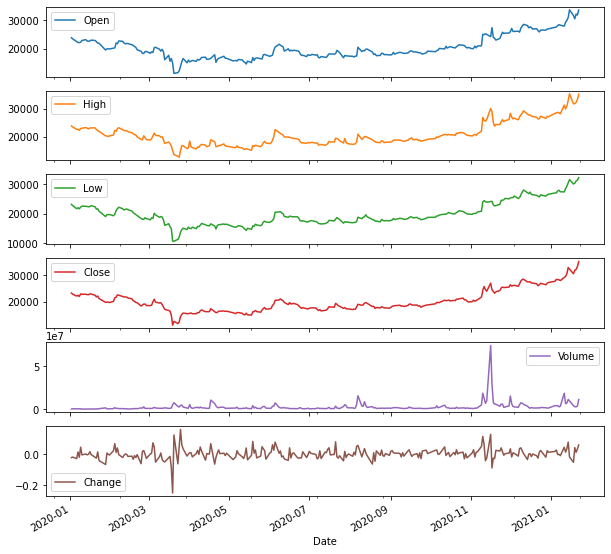

In [156]:
# 수집한 종목의 선그래프를 Pandas 로 그립니다.
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.

g = stock_daily.plot(subplots=True,figsize = (10,10))

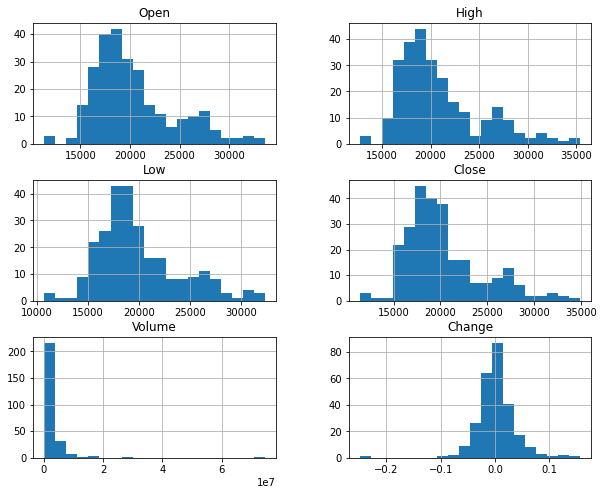

In [157]:
h = stock_daily.hist(figsize=(10,8),bins=20)

<AxesSubplot:xlabel='Date'>

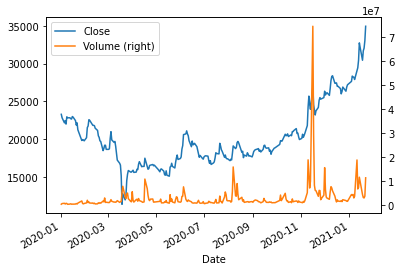

In [158]:
#2축 그래프 그리기
stock_daily[["Close","Volume"]].plot(secondary_y="Volume")

In [159]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,263.000000,263.000000,263.000000,263.000000,2.630000e+02,263.000000
mean,20319.190114,20806.551331,19875.532319,20303.927757,2.921890e+06,0.002110
std,4070.401752,4225.844202,4000.079548,4130.887997,5.511416e+06,0.035821
min,11372.000000,12710.000000,10703.000000,11373.000000,2.693280e+05,-0.248613
25%,17650.000000,17900.000000,17250.000000,17509.500000,1.043335e+06,-0.018265
50%,19250.000000,19700.000000,18850.000000,19192.000000,1.497490e+06,0.002410
75%,22139.000000,22610.000000,21721.000000,22076.500000,2.884406e+06,0.019225
max,33600.000000,35400.000000,32300.000000,34950.000000,7.450910e+07,0.156649
